In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [7]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [8]:
%matplotlib inline

In [9]:
Phone_Calls_Derecho = pd.read_csv('data/911_Phone Calls_Derecho.csv')

In [10]:
Phone_Calls_Derecho.head()

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE
2,5/3/2020 16:30,911 Calls,36.100516,-87.056329,8013 C MCCRORY LN - N
3,5/3/2020 16:30,911 Calls,36.130021,-86.927819,5758 RIVER RD - SW
4,5/3/2020 16:31,911 Calls,36.142380,-86.881882,3744B ANNEX AVE - SE


In [11]:
Phone_Calls_Derecho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Seizure DateTime    1549 non-null   object 
 1   CallTypeId          1549 non-null   object 
 2   ALI Latitude        1483 non-null   float64
 3   ALI Longitude       1483 non-null   float64
 4   Cell Tower Address  1525 non-null   object 
dtypes: float64(2), object(3)
memory usage: 60.6+ KB


In [52]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(Phone_Calls_Derecho['ALI Longitude'], Phone_Calls_Derecho['ALI Latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf1 = gpd.GeoDataFrame(Phone_Calls_Derecho, crs=crs, geometry=geometry)


C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [13]:
gdf

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER,POINT (-86.71685 36.24780)
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE,POINT (-86.80062 36.14311)
2,5/3/2020 16:30,911 Calls,36.100516,-87.056329,8013 C MCCRORY LN - N,POINT (-87.05633 36.10052)
3,5/3/2020 16:30,911 Calls,36.130021,-86.927819,5758 RIVER RD - SW,POINT (-86.92782 36.13002)
4,5/3/2020 16:31,911 Calls,36.142380,-86.881882,3744B ANNEX AVE - SE,POINT (-86.88188 36.14238)
...,...,...,...,...,...,...
1544,5/4/2020 0:18,911 Calls,36.131694,-86.770535,1823-C 12TH AV - SECTOR SE S,POINT (-86.77053 36.13169)
1545,5/4/2020 0:22,911 Calls,36.042237,-86.743455,5244-C EDMONSON PIKE - SECTOR SE,POINT (-86.74346 36.04224)
1546,5/4/2020 0:25,911 Calls,36.077664,-86.655607,2747-B MURFREESBORO PKE - SECTOR NW,POINT (-86.65561 36.07766)
1547,5/4/2020 0:29,911 Calls,36.024706,-86.743562,302 SUMMIT VIEW DR - E,POINT (-86.74356 36.02471)


In [14]:
zipcodes = gpd.read_file('data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


<AxesSubplot:>

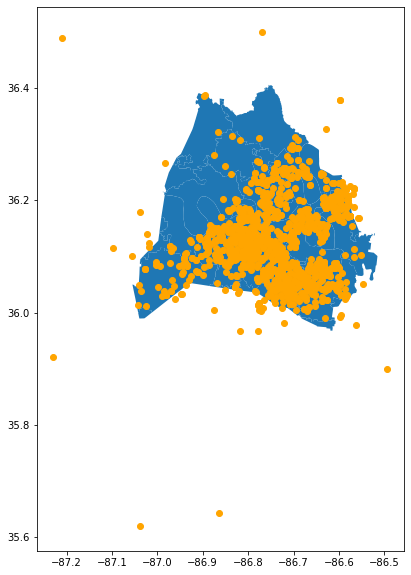

In [53]:
fig,ax=plt.subplots(figsize=(10,10))
ax=zipcodes.plot(ax=ax)
gdf1.plot(ax=ax,color='orange')

In [16]:
Phone_Calls_Derecho.shape

(1549, 6)

In [17]:
Phone_Calls_Derecho.describe()

,ALI Latitude,ALI Longitude
count,1483.000000,1483.000000
mean,36.123723,-86.739853
std,0.070308,0.097578
min,35.620058,-87.229171
25%,36.071173,-86.801637
50%,36.122221,-86.734142
75%,36.169894,-86.667518
max,36.499779,-86.493559


In [18]:
Phone_Calls_Tornado = pd.read_csv('data/911_Phone_Calls_Tornado.csv')

In [19]:
Phone_Calls_Tornado.head()

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE
2,3/3/2020 0:36,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector
3,3/3/2020 0:36,911 Calls,NaN,NaN,526 FOUNDRY DR
4,3/3/2020 0:36,911 Calls,36.233467,-86.721077,5007B RUSKIN AVE - N


In [20]:
Phone_Calls_Tornado['time'] = Phone_Calls_Tornado['Seizure DateTime'].str.split(' ').str[1]


In [54]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(Phone_Calls_Tornado['ALI Longitude'],Phone_Calls_Tornado['ALI Latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf2 = gpd.GeoDataFrame(Phone_Calls_Tornado, crs=crs, geometry=geometry)


C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

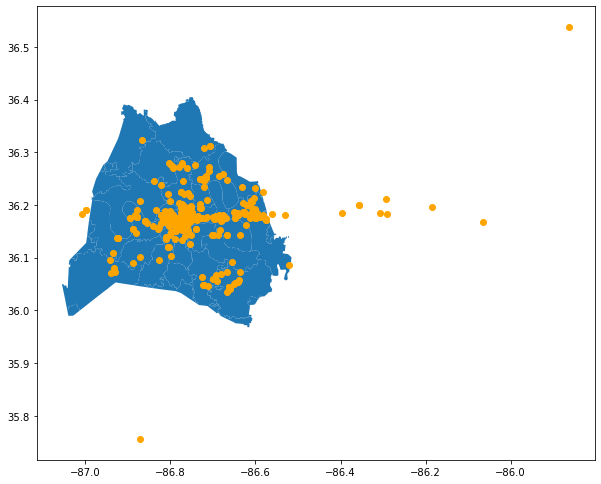

In [55]:
fig,ax=plt.subplots(figsize=(10,10))
ax=zipcodes.plot(ax=ax)
gdf2.plot(ax=ax,color='orange')

In [21]:
Phone_Calls_Tornado.head


<bound method NDFrame.head of     Seizure DateTime CallTypeId  ALI Latitude  ALI Longitude  \
0      3/3/2020 0:34  911 Calls     36.072708     -86.665779   
1      3/3/2020 0:36  911 Calls     36.159634     -86.841904   
2      3/3/2020 0:36  911 Calls     36.264153     -86.708862   
3      3/3/2020 0:36  911 Calls           NaN            NaN   
4      3/3/2020 0:36  911 Calls     36.233467     -86.721077   
..               ...        ...           ...            ...   
470    3/3/2020 4:54  911 Calls     36.142552     -86.635330   
471    3/3/2020 4:54  911 Calls     36.189415     -86.813557   
472    3/3/2020 4:55  911 Calls     36.223534     -86.757874   
473    3/3/2020 4:56  911 Calls     36.168398     -86.783774   
474    3/3/2020 4:58  911 Calls     36.276566     -86.799417   

                    Cell Tower Address  time  
0           620 Richards RD - N Sector  0:34  
1               4507D KENTUCKY AV - SE  0:36  
2             329 THELMA ST - S Sector  0:36  
3            

In [22]:
Phone_Calls_Tornado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Seizure DateTime    475 non-null    object 
 1   CallTypeId          475 non-null    object 
 2   ALI Latitude        450 non-null    float64
 3   ALI Longitude       450 non-null    float64
 4   Cell Tower Address  468 non-null    object 
 5   time                475 non-null    object 
dtypes: float64(2), object(4)
memory usage: 22.4+ KB


In [23]:
Phone_Calls_Derecho.shape

(1549, 6)

In [24]:
Phone_Calls_Derecho.describe()

,ALI Latitude,ALI Longitude
count,1483.000000,1483.000000
mean,36.123723,-86.739853
std,0.070308,0.097578
min,35.620058,-87.229171
25%,36.071173,-86.801637
50%,36.122221,-86.734142
75%,36.169894,-86.667518
max,36.499779,-86.493559


In [25]:
 Computer_Aided_Derecho=pd.read_csv('data/Computer Aided Dispatch Data_Derecho Incidents.csv',skiprows=3)

In [26]:
Computer_Aided_Derecho.head()

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
0,5/3/2020 4:31:07 PM,901 KENWICK CT W,36.046877,-86.962526,ELECTRICAL HAZARD
1,5/3/2020 4:32:18 PM,8036 ARBOR DR,36.082491,-86.940680,ELECTRICAL HAZARD
2,5/3/2020 4:32:23 PM,119 DUE WEST AV E,36.248029,-86.716875,NOT ALERT COPD
3,5/3/2020 4:33:04 PM,630 GALLATIN PKE S,36.256491,-86.714817,ABDOMINAL PAIN
4,5/3/2020 4:33:52 PM,615 W HILLWOOD DR,36.129690,-86.879834,ELECTRICAL HAZARD


In [72]:
Computer_Aided_Derecho = Computer_Aided_Derecho.rename(columns={'Latitude1': 'ALI Latitude','Longitude1':'ALI Longitude'})

In [73]:
Computer_Aided_Derecho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   IncidentDate              627 non-null    object  
 1   Location                  627 non-null    object  
 2   ALI Latitude              627 non-null    float64 
 3   ALI Longitude             627 non-null    float64 
 4   IncidentTypeDescription1  627 non-null    object  
 5   geometry                  627 non-null    geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 29.5+ KB


In [76]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(Computer_Aided_Derecho['ALI Latitude'], Computer_Aided_Derecho['ALI Longitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf3 = gpd.GeoDataFrame(Computer_Aided_Derecho, crs=crs, geometry=geometry)

<AxesSubplot:>

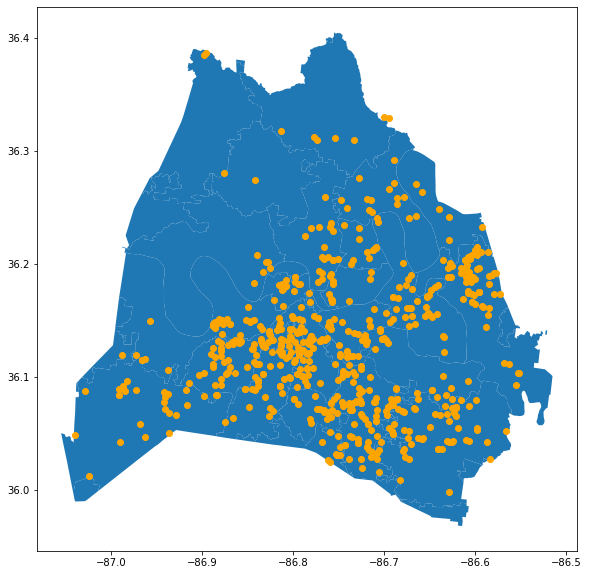

In [57]:
fig,ax=plt.subplots(figsize=(10,10))
ax=zipcodes.plot(ax=ax)
gdf3.plot(ax=ax,color='orange')

In [30]:
Computer_Aided_Derecho.describe()

,Latitude1,Longitude1
count,627.000000,627.000000
mean,36.128578,-86.749447
std,0.062121,0.096070
min,35.997889,-87.039809
25%,36.080705,-86.812446
50%,36.126693,-86.749134
75%,36.167679,-86.683643
max,36.387306,-86.551860


In [31]:
unemp = pd.read_csv('data/unemployment.csv')

In [32]:
unemp.head()

,COUNTY,STATE,periodName,year,unemployment_rate
0,Anderson,TN,December,2018,3.2
1,Bedford,TN,December,2018,3.2
2,Benton,TN,December,2018,3.8
3,Bledsoe,TN,December,2018,5.4
4,Blount,TN,December,2018,2.8


In [33]:
Computer_Aided_Derecho.shape


(627, 6)

In [34]:
Computer_Aided_Tornado=pd.read_csv('data/Computer Aided Dispatch Data_Tornado Incidents.csv',skiprows=3)

In [35]:
Computer_Aided_Tornado.head()

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
0,3/3/2020 12:36:34 AM,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
1,3/3/2020 12:37:24 AM,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
2,3/3/2020 12:38:17 AM,110 TUNE AIRPORT DR,36.179299,-86.883727,STRUCTURE FIRE COMMERCIAL INDUSTRIAL
3,3/3/2020 12:39:40 AM,555 MARRIOTT DR,36.151108,-86.689921,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
4,3/3/2020 12:39:42 AM,1414 COUNTY HOSPITAL RD,36.177926,-86.845934,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD


In [74]:
Computer_Aided_Tornado = Computer_Aided_Tornado.rename(columns={'Latitude1': 'ALI Latitude','Longitude1':'ALI Longitude'})

In [75]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(Computer_Aided_Tornado['ALI Latitude'], Computer_Aided_Tornado['ALI Longitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf4 = gpd.GeoDataFrame(Computer_Aided_Tornado, crs=crs, geometry=geometry)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

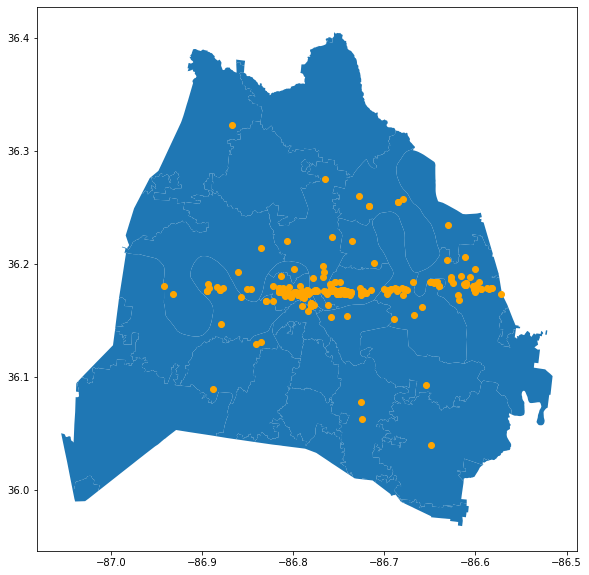

In [60]:
fig,ax=plt.subplots(figsize=(10,10))
ax=zipcodes.plot(ax=ax)
gdf4.plot(ax=ax,color='orange')

In [36]:
Computer_Aided_Tornado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IncidentDate              260 non-null    object 
 1   Location                  260 non-null    object 
 2   Latitude1                 260 non-null    float64
 3   Longitude1                260 non-null    float64
 4   IncidentTypeDescription1  260 non-null    object 
dtypes: float64(2), object(3)
memory usage: 10.3+ KB


In [37]:
Computer_Aided_Tornado.describe()

,Latitude1,Longitude1
count,260.000000,260.000000
mean,36.177706,-86.742293
std,0.024177,0.077876
min,36.039720,-86.942131
25%,36.174237,-86.791411
50%,36.175902,-86.756315
75%,36.179367,-86.692977
max,36.323404,-86.572173


In [39]:
 nash_prop_trends= pd.read_csv('data/Nash_Prop_ValueTrends.csv')

In [40]:
nash_prop_trends.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/1996,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
0,753844,2551,29486,Zip,SC,SC,Summerville,Charleston-North Charleston,Dorchester County,100760.0,...,239740,240005,240202,240442,241056,242214,243827,245750,247870,249450
1,753843,2850,97703,Zip,OR,OR,Bend,Bend-Redmond,Deschutes County,176791.0,...,634146,637534,643815,646851,652681,654977,659011,661931,668427,677223
2,738094,31781,73960,Zip,OK,OK,Texhoma,Guymon,Texas County,NaN,...,60287,60072,60229,60700,61160,61542,61958,62411,62969,63814
3,738092,4398,97003,Zip,OR,OR,Beaverton,Portland-Vancouver-Hillsboro,Washington County,136389.0,...,368190,369056,370202,372810,374801,376746,377646,378609,380414,384151
4,698721,6485,86005,Zip,AZ,AZ,Flagstaff,Flagstaff,Coconino County,167343.0,...,435860,436876,437829,439915,442851,445239,446905,448757,452478,457389


In [ ]:
# matched all the tables

In [80]:
d1 = gdf1['geometry']
d2 = gdf2['geometry']
d3 = gdf3['geometry']
d4 = gdf4['geometry']

In [77]:
gdf = pd.concat([gdf1, gdf2,gdf3,gdf4])


In [78]:
gdf.head()

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,geometry,time,IncidentDate,Location,IncidentTypeDescription1
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER,POINT (-86.71685 36.24780),NaN,NaN,NaN,NaN
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE,POINT (-86.80062 36.14311),NaN,NaN,NaN,NaN
2,5/3/2020 16:30,911 Calls,36.100516,-87.056329,8013 C MCCRORY LN - N,POINT (-87.05633 36.10052),NaN,NaN,NaN,NaN
3,5/3/2020 16:30,911 Calls,36.130021,-86.927819,5758 RIVER RD - SW,POINT (-86.92782 36.13002),NaN,NaN,NaN,NaN
4,5/3/2020 16:31,911 Calls,36.142380,-86.881882,3744B ANNEX AVE - SE,POINT (-86.88188 36.14238),NaN,NaN,NaN,NaN


In [79]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(gdf['ALI Latitude'], gdf['ALI Longitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf4 = gpd.GeoDataFrame(Computer_Aided_Tornado, crs=crs, geometry=geometry)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


ValueError: Length of values (2911) does not match length of index (260)

In [82]:
nasville_price = nash_prop_trends.loc[(nash_prop_trends['StateName']=='TN')&(nash_prop_trends['City']=='Nashville')]


In [ ]:
# explore these pandas methods, attributes, and accessors
read_csv( )
.shape
.head( )
.tail( )
.columns
.drop( )
.rename( )
.query( )
.loc[ ]
.iloc[ ]
[[ ]]

In [88]:
nasville_price.columns


Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '1/31/1996',
       ...
       '12/31/2019', '1/31/2020', '2/29/2020', '3/31/2020', '4/30/2020',
       '5/31/2020', '6/30/2020', '7/31/2020', '8/31/2020', '9/30/2020'],
      dtype='object', length=306)

In [89]:
nasville_price.shape


(25, 306)

In [87]:
nasville_price

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/1996,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
19022,74252,988,37221,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,141071.0,...,317355,318986,320464,322454,324433,326460,328274,330013,331939,334253
19023,74251,11990,37220,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,180731.0,...,498516,502083,505889,510401,515067,519804,524819,530748,537383,543876
19024,74250,13873,37219,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,NaN,...,334217,335702,337773,340655,343786,345660,347060,349377,352653,354479
19025,74249,8344,37218,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,95571.0,...,219700,221834,224373,227064,229667,231237,232744,234323,235970,237923
19026,74248,2645,37217,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,90883.0,...,230815,232110,233312,234926,236450,238084,239332,240701,242042,243999
19027,74247,5747,37216,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,85202.0,...,312622,314284,315822,317694,320824,324359,327726,331274,334857,338892
19028,74246,3968,37215,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,221679.0,...,591613,594751,598317,603077,608063,612453,616357,621032,626461,632981
19029,74245,2218,37214,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,91082.0,...,248930,249946,251103,252666,254539,256454,258234,260054,262247,264934
19030,74243,6408,37212,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,88787.0,...,366208,368587,370013,372113,374117,376563,378712,381783,385009,388452
19031,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,104157.0,...,267768,268705,269829,271358,273335,275236,276925,278774,280774,283235


In [84]:
nasville_price['RegionName']

19022    37221
19023    37220
19024    37219
19025    37218
19026    37217
19027    37216
19028    37215
19029    37214
19030    37212
19031    37211
19032    37210
19033    37209
19034    37208
19035    37207
19036    37206
19037    37205
19038    37204
19039    37203
19040    37201
19043    37189
19074    37138
19084    37115
19098    37080
19101    37076
19148    37013
Name: RegionName, dtype: int64

In [85]:
nasville_price.dtypes

RegionID       int64
SizeRank       int64
RegionName     int64
RegionType    object
StateName     object
               ...  
5/31/2020      int64
6/30/2020      int64
7/31/2020      int64
8/31/2020      int64
9/30/2020      int64
Length: 306, dtype: object